*Goal:* We want to see what the general distribution of spot sizes is in pixels to pick our general spot size.

Outcome: 380 is right to have just the spot size.
        505 is the max without overlap.
        

In [7]:
import pickle
import glob
import matplotlib.pyplot as plt

import pandas as pd

In [3]:
# Get pickle from each sample that we made when patching (could also use `scalefactors_json.json`)
dict_paths = glob.glob("../patched_data/*/sample_data_dict.pickle")

sizes= []

for path in dict_paths:
    dict = pickle.load(open(path, "rb"))
    sizes += [dict['spot_diameter_fures']]

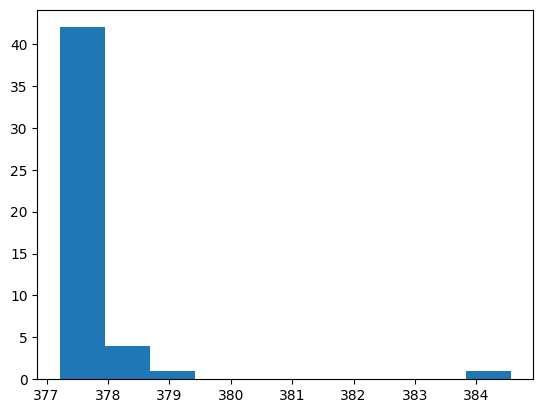

In [4]:
plt.hist(sizes)
plt.show()

We can see from the above that Kacper's original choice of 380 pixels for the spots of the model is well justified if we just want the area under the spot itself.

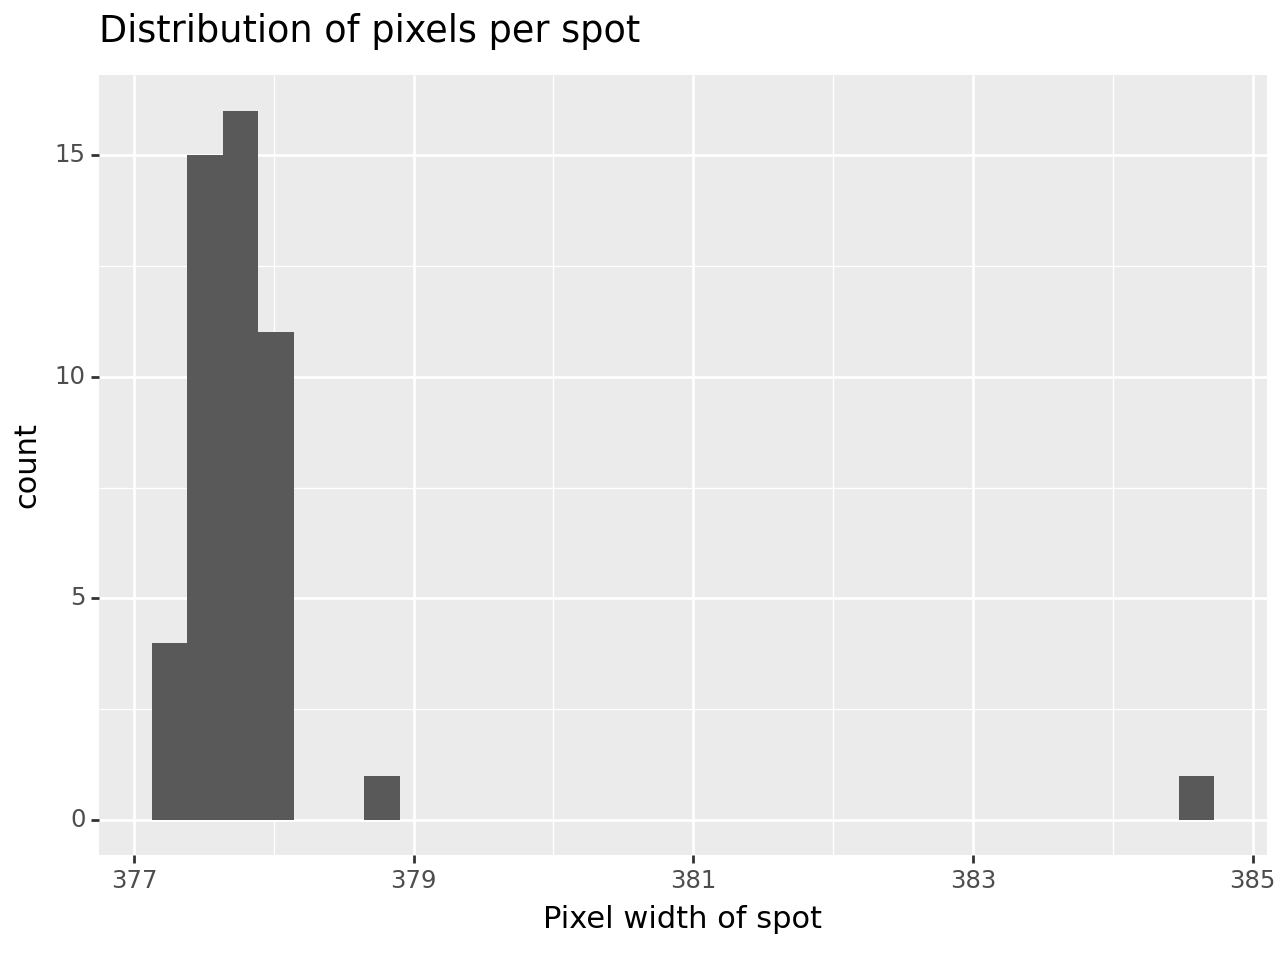

<Figure Size: (640 x 480)>

In [5]:
# R like implementation just to see

import plotnine
import pandas as pd
df_size = pd.DataFrame(data = sizes, columns = ["sizes"])

(plotnine.ggplot(df_size, plotnine.aes(x = "sizes")) + 
    plotnine.geoms.geom_histogram(bins = 30) +
    plotnine.labels.ggtitle("Distribution of pixels per spot") +
    plotnine.xlab("Pixel width of spot"))

Now let us consider how big a maximum patch size we can get if we were to extend beyond the bounds of the spot alone.

Horizontal distance:

c:\Users\cbainton\AppData\Local\anaconda3\envs\tf\lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 2'. Pick better value with 'binwidth'.


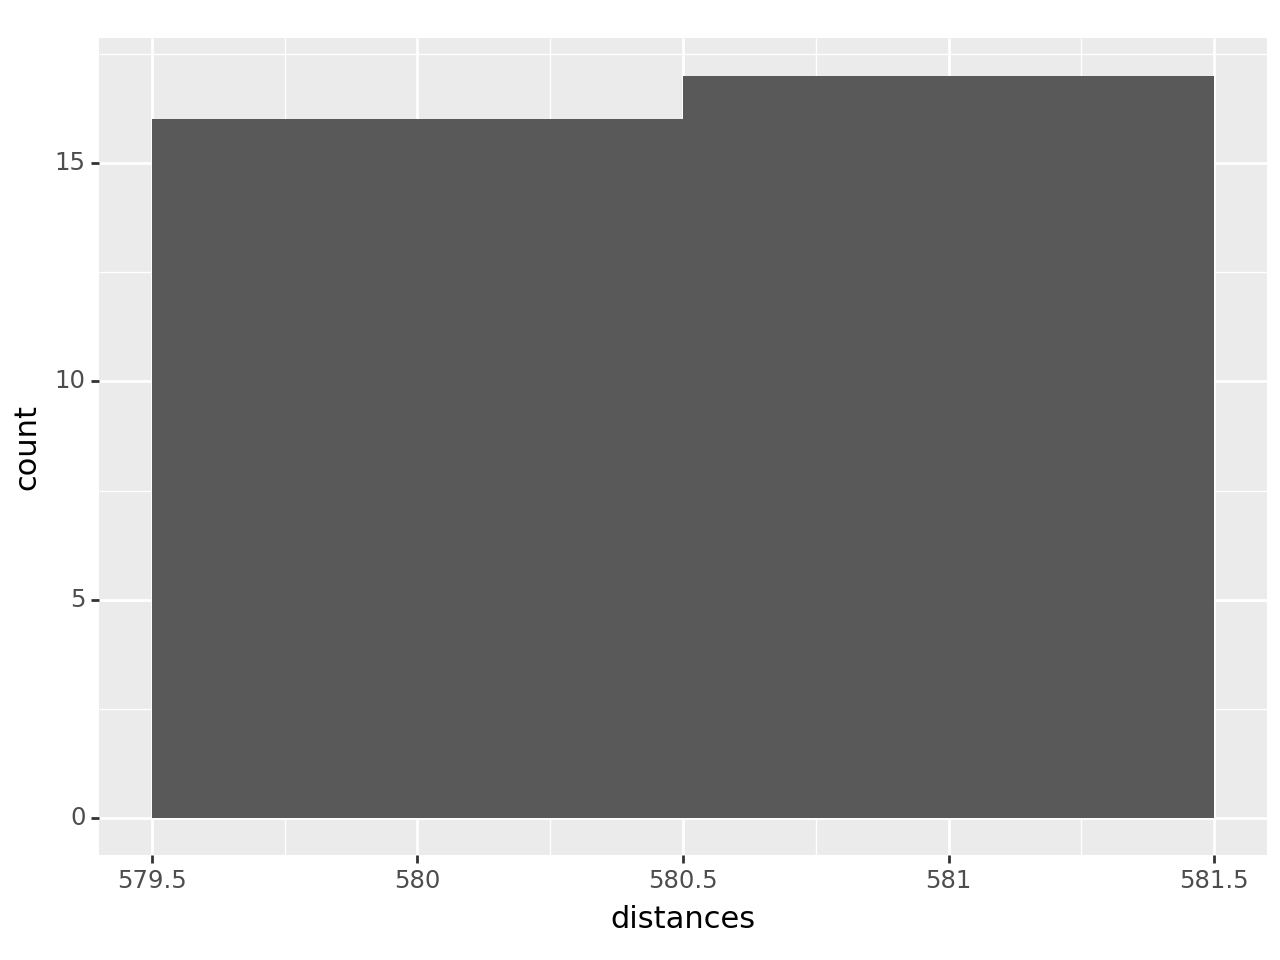

<Figure Size: (640 x 480)>

In [8]:
spot_pos_33a = pd.read_csv('..\patched_data\V10F03-033_A\spot_positions.csv')

on_row_0 = spot_pos_33a.loc[spot_pos_33a.loc[:,'array_row'] == 0, 'pxl_col_fures']

horizontal_distances = on_row_0.to_numpy()[1:] - on_row_0.to_numpy()[:-1]

horizontal =  pd.DataFrame(horizontal_distances, columns=['distances'])
(plotnine.ggplot(horizontal, plotnine.aes('distances')) + 
    plotnine.geoms.geom_histogram())

We can see that the distance between centers is about 580 pixels. Recall that this is technically the distance is two columns away on the array columns because of an isometric grid.

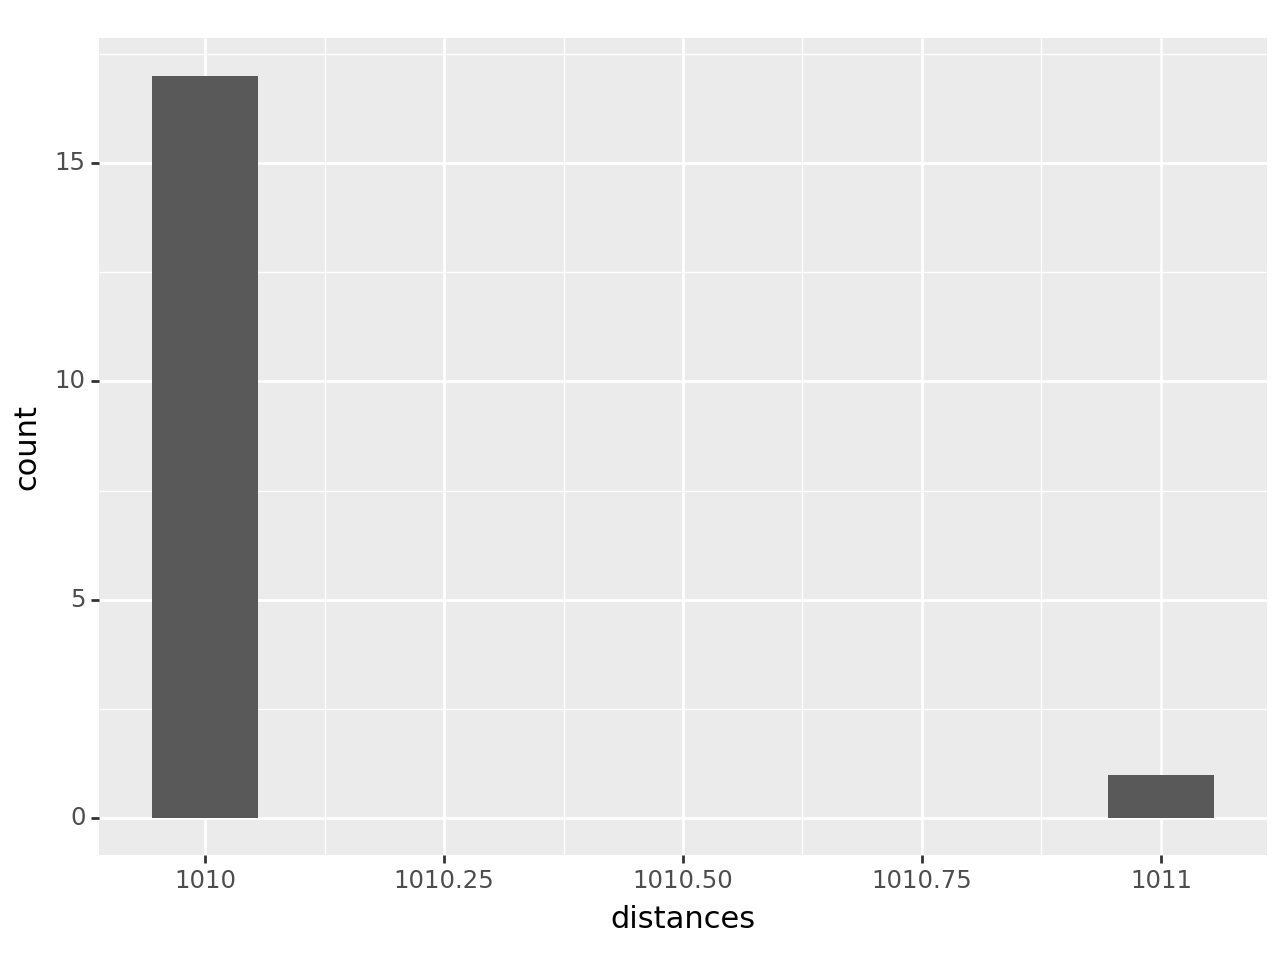

<Figure Size: (640 x 480)>

In [9]:
# spot_pos_33a = pd.read_csv('..\patched_data\V10F03-033_A\spot_positions.csv')

on_col_100 = spot_pos_33a.loc[spot_pos_33a.loc[:,'array_col'] == 100, 'pxl_row_fures']

vertical_distances = on_col_100.to_numpy()[1:] - on_col_100.to_numpy()[:-1]

vertical =  pd.DataFrame(vertical_distances, columns=['distances'])
(plotnine.ggplot(vertical, plotnine.aes('distances')) + 
    plotnine.geoms.geom_histogram(bins = 10))

We can see that the vertical distance is about 1010. This is two rows away for the isometric grid.

Diagonal distance:

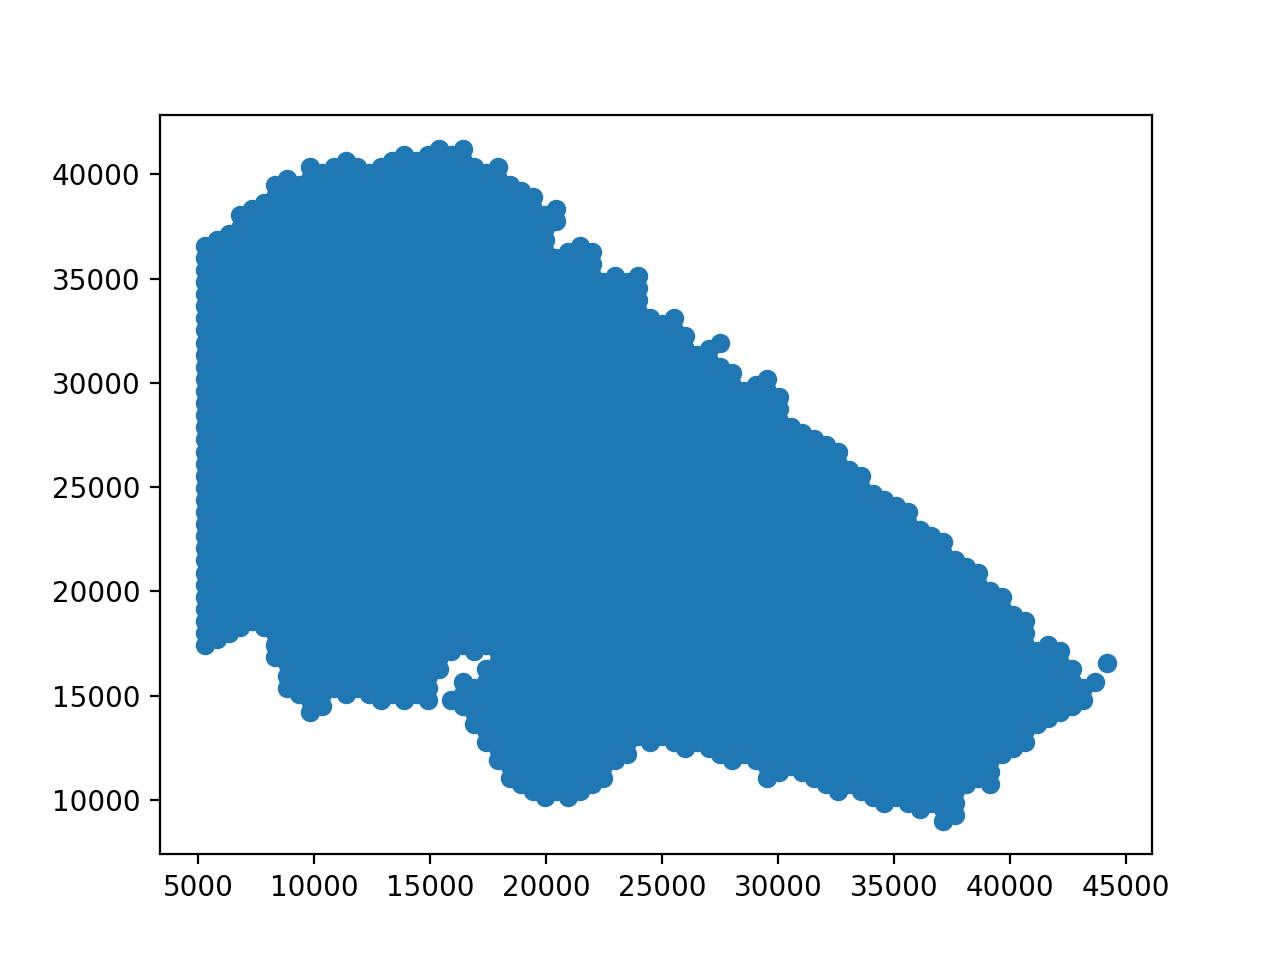

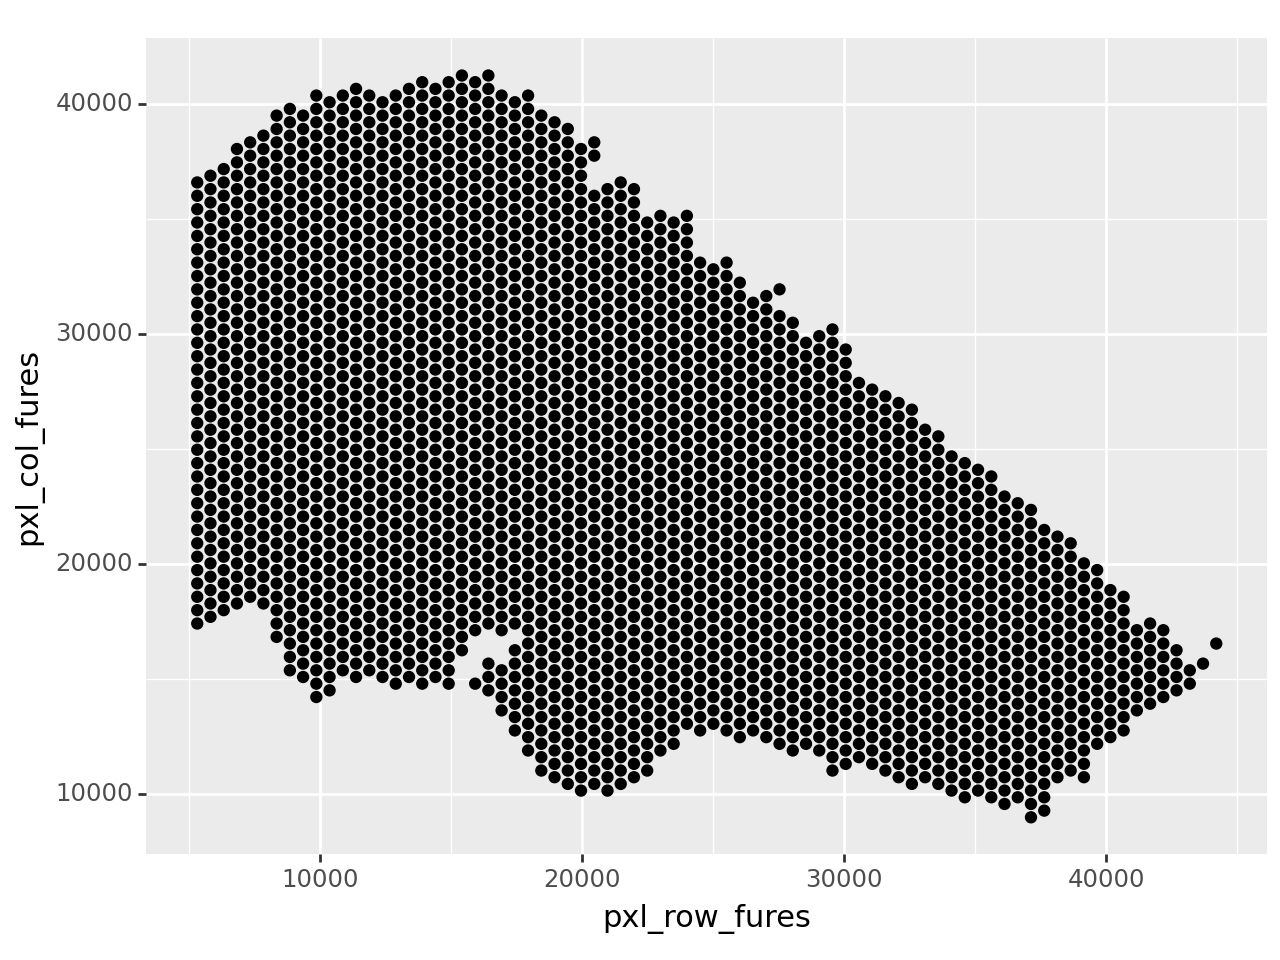

<Figure Size: (640 x 480)>

In [10]:
plt.scatter(spot_pos_33a['pxl_row_fures'], spot_pos_33a['pxl_col_fures'])
plt.show()

(plotnine.ggplot(spot_pos_33a, plotnine.aes('pxl_row_fures', 'pxl_col_fures')) +
    plotnine.geoms.geom_point())

We know that the vertical dist is 1010 and horizontal dist is 580. The slope is not 1 to 1, but closer to 2 to 1. To check if the heights would overlap, we can just take half of the vertical distance, 505. This is the distance from row 0 to row 1 for example. Then if we expect overlap, then we find that the max height from the center must be 252.5 pixels. We expect this to be the limitting factor of overlap, so the limit for diagonal style overlap is height 252.5 with the max patch size then **505**.

### Figures to demonstrate

33c is used here as a better demo

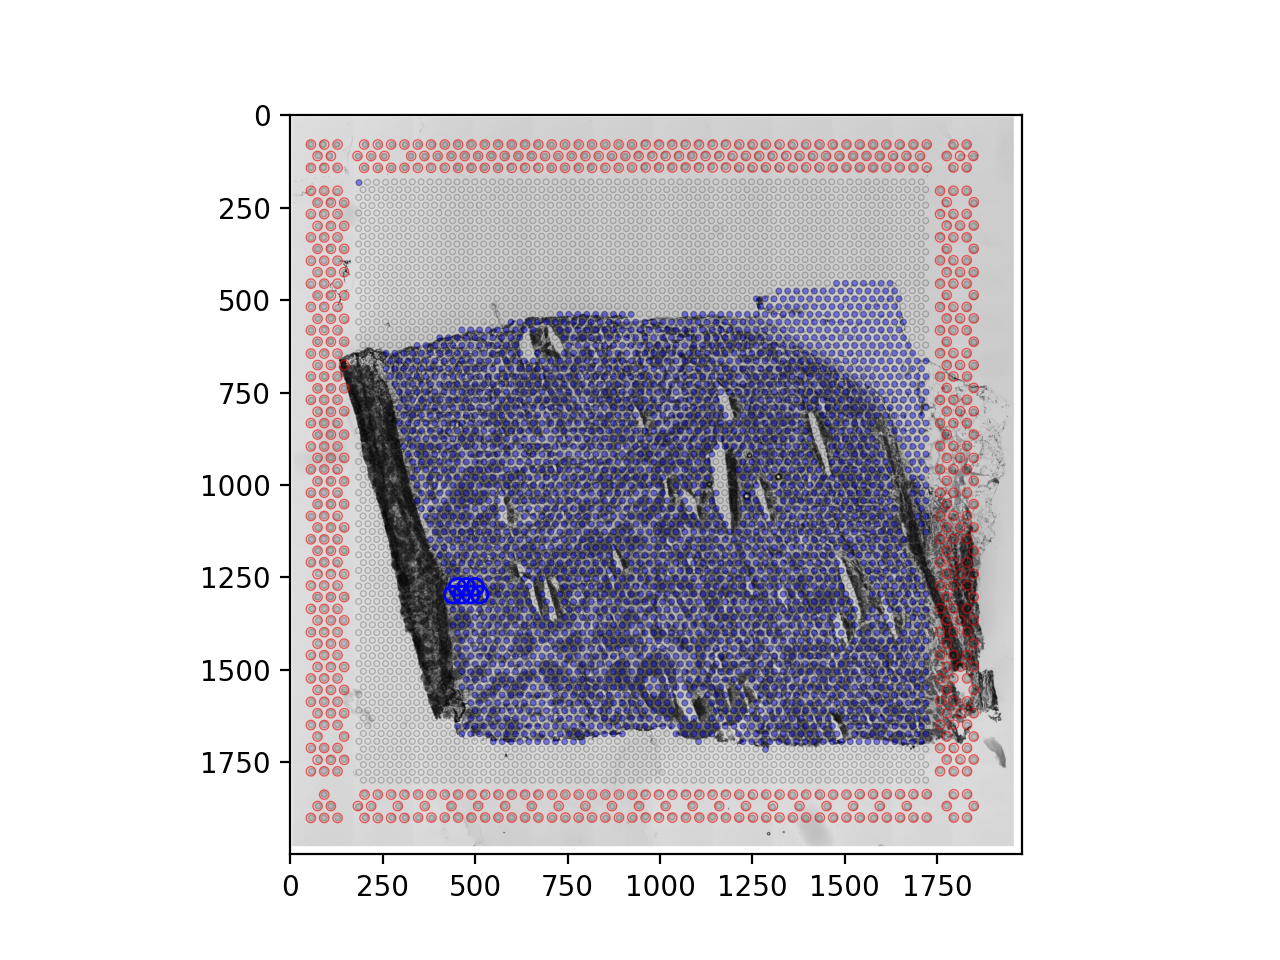

In [46]:
spot_pos_33c = pd.read_csv('../patched_data/V10F03-033_C/spot_positions.csv')

aligned_spots = plt.imread(R"C:\Users\cbainton\Desktop\ST_project\original_data\Spaceranger_analysis\V10F03-033_C\outs\spatial\detected_tissue_image.jpg")
plt.imshow(aligned_spots)
# plt.scatter(spot_pos_33c['pxl_col_hires'], spot_pos_33c['pxl_row_hires'], 
#     marker=',', ) #facecolors='none', edgecolors='b', )
few_points = spot_pos_33c.iloc[2000:2007,:]
plt.scatter(few_points['pxl_col_hires'], few_points['pxl_row_hires'], 
    marker='o', facecolors='none', edgecolors='b')
plt.show()

In [62]:
# This load in fails

import os
os.environ["OPENCV_IO_MAX_IMAGE_PIXELS"] = pow(2,30).__str__() # Necessary to load in full size images
os.environ["CV_IO_MAX_IMAGE_PIXELS"] = pow(2,30).__str__()
%set_env OPENCV_IO_MAX_IMAGE_PIXELS = pow(2,30).__str__()
%set_env CV_IO_MAX_IMAGE_PIXELS = pow(2,30).__str__()
import cv2


full_image_33c = cv2.imread(R"..\original_data\High-resolution_tissue_images\V10F03-033\201210_BC_V10F03-033_S8C-T_RJ.C1-Spot000001.jpg")


env: OPENCV_IO_MAX_IMAGE_PIXELS=pow(2,30).__str__()
env: CV_IO_MAX_IMAGE_PIXELS=pow(2,30).__str__()


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:79: error: (-215:Assertion failed) pixels <= CV_IO_MAX_IMAGE_PIXELS in function 'cv::validateInputImageSize'
